# Analysis

This file contains the public data analysis for "Characterizing the US Research Computing and Data (RCD) Workforce."

In [1]:
library(tidyverse, warn.conflicts = FALSE)
library(janitor, warn.conflicts = FALSE) # chisq.test, fisher.test are masked from package:stats

── Attaching packages ────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ───────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Data

In [2]:
all_freq <- read_csv("data_to_share/var_frequencies_all_respondents.csv", show_col_types = FALSE)
institutions <- read_csv("data_to_share/institutions_all.csv", show_col_types = FALSE)
all_edu_work <- read_csv("data_to_share/education_work_all_respondents.csv", show_col_types = FALSE)
rcd_edu_work <- read_csv("data_to_share/education_work_rcd_respondents.csv", show_col_types = FALSE)
gender <- read_csv("data_to_share/gender_counts.csv", show_col_types = FALSE)
ethnicity <- read_csv("data_to_share/ethnicity_counts.csv", show_col_types = FALSE)
jobs <- read_csv("data_to_share/job_titles.csv", show_col_types = FALSE)
facings <- read_csv("data_to_share/facings.csv", show_col_types = FALSE)
satisfaction <- read_csv("data_to_share/satisfaction_rcd_respondents.csv", show_col_types = FALSE)
inclusion <- read_csv("data_to_share/inclusion.csv", show_col_types = FALSE)

## 3: Surveying the Workforce

### Institution Counts

In [3]:
length(unique(institutions$institution_code))

[1] 175

In [77]:
institutions %>%
  distinct(institution_code, .keep_all=TRUE) %>%
  tabyl(institution_type) -> institution_counts
institution_counts

,institution_type,n,percent,valid_percent
,<chr>,<int>,<dbl>,<dbl>
1,Academic Computing Center,5,0.028571429,0.02873563
2,Company,8,0.045714286,0.04597701
3,Government,5,0.028571429,0.02873563
4,Medical,10,0.057142857,0.05747126
5,Other,7,0.040000000,0.04022989
6,Other Academic,18,0.102857143,0.10344828
7,R1,91,0.520000000,0.52298851
8,R2,30,0.171428571,0.17241379
9,NA,1,0.005714286,NA


In [5]:
institutions %>%
  filter(!is.na(institution_code)) %>%
  count(institution_code) %>%
  summarize(median(n),
            max(n))

median(n),max(n)
<dbl>,<int>
2,26


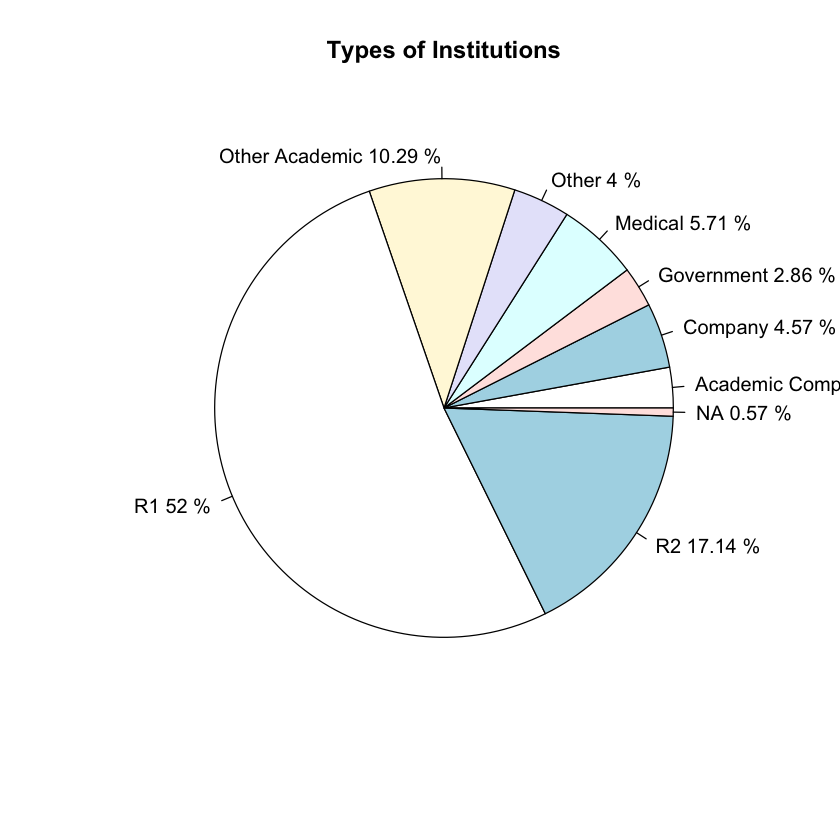

In [91]:
pie(institution_counts$n, 
    paste(institution_counts$institution_type,' ',
          round(institution_counts$percent*100,2),
          ' %',sep=""), 
    main="Types of Institutions")

### R1/R2

In [6]:
institutions %>%
  filter(academic_institution) %>%
  summarize(R1_respondents = sum(institution_type == "R1")/n(),
            R1_inst = n_distinct(institution_code[institution_type == "R1"])/n_distinct(institution_code))

R1_respondents,R1_inst
<dbl>,<dbl>
0.8163717,0.6319444


### Respondents

In [7]:
filter(all_freq, variable == "rcd_employed")

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
rcd_employed,No/No Answer,24,0.04262877
rcd_employed,Yes,539,0.95737123


In [8]:
sum(rcd_edu_work$academic_institution, na.rm=TRUE)/sum(!is.na(rcd_edu_work$academic_institution))

[1] 0.8607843

## 4.1 Demographics

### Age

In [9]:
filter(all_freq, variable=="age")

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
age,20 - 24,11,0.01953819
age,25 - 34,96,0.17051510
age,35 - 44,167,0.29662522
age,45 - 54,171,0.30373002
age,55 - 64,99,0.17584369
age,65 - 74,19,0.03374778


### Race/Ethnicity

In [92]:
filter(all_freq, variable=="ethnicity1") -> race_ethnicity
race_ethnicity

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
ethnicity1,Asian,59,0.10479574
ethnicity1,Black or African American,10,0.01776199
ethnicity1,Multiple/Native Hawaiian or Pacific Islander/Jewish/Middle Eastern/Mediterranean/Other Unspecified,15,0.02664298
ethnicity1,White (Hispanic),9,0.01598579
ethnicity1,White (Not Hispanic),435,0.77264654
ethnicity1,NA,35,0.06216696


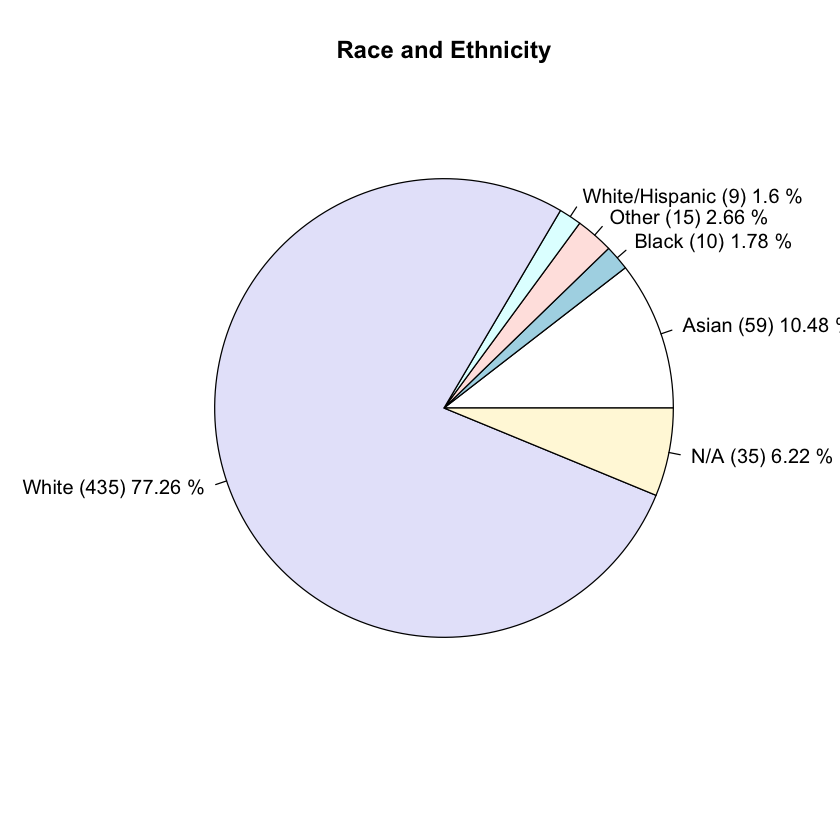

In [110]:
pie(race_ethnicity$n, 
    paste(c('Asian','Black','Other','White/Hispanic','White','N/A'),
          ' (',
          race_ethnicity$n,
          ') ',
          round(race_ethnicity$prop*100,2),
          ' %',sep=""), 
    main="Race and Ethnicity")

In [11]:
filter(all_freq, variable=="hispanic")

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
hispanic,FALSE,516,0.91651865
hispanic,TRUE,13,0.02309059
hispanic,NA,34,0.06039076


### Gender

In [99]:
filter(all_freq, variable=="gender") -> gender_freq
gender_freq

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
gender,Female,134,0.23801066
gender,Male,396,0.70337478
gender,Non-binary/Nonconforming/Genderqueer,12,0.02131439
gender,Other/No Answer,21,0.03730018


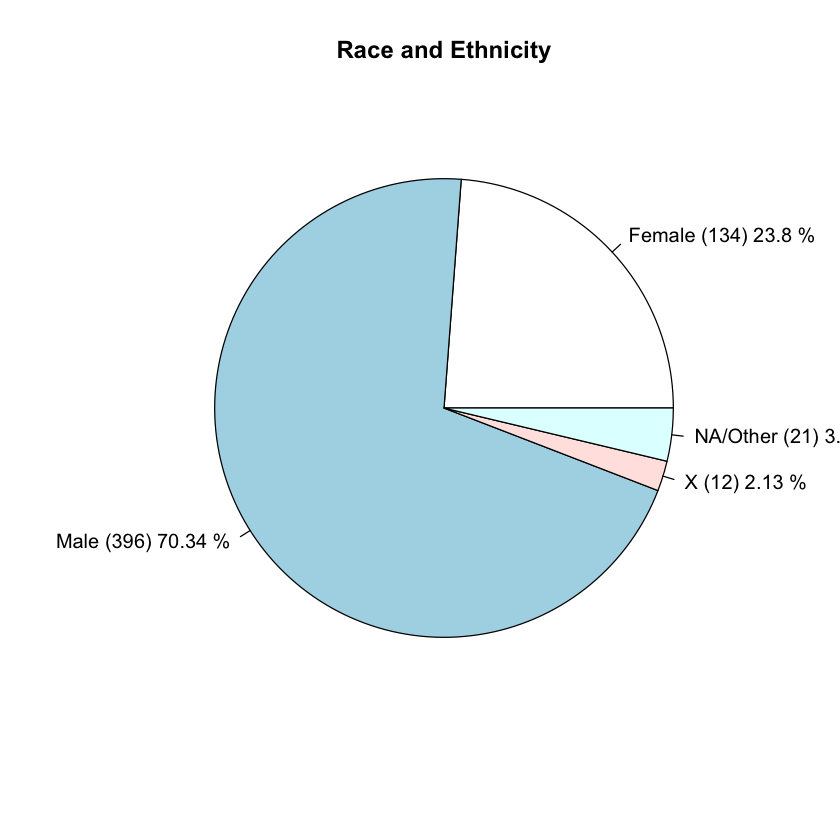

In [101]:
pie(gender_freq$n, 
    paste(c('Female','Male','X','NA/Other'),
          ' (',
          gender_freq$n,
          ') ',
          round(gender_freq$prop*100,2),
          ' %',sep=""), 
    main="Race and Ethnicity")

### US Citizenship/Residency

In [13]:
filter(all_freq, variable=="us_perm")

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
us_perm,FALSE,26,0.04618117
us_perm,TRUE,519,0.92184725
us_perm,NA,18,0.03197158


### Sexual Orientation

In [102]:
filter(all_freq, variable=="sex_orientation") -> orientation
orientation

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
sex_orientation,A sexual orientation not listed here,2,0.003552398
sex_orientation,Asexual,13,0.023090586
sex_orientation,Bisexual,15,0.026642984
sex_orientation,Gay / Lesbian,19,0.033747780
sex_orientation,Heterosexual / Straight,435,0.772646536
sex_orientation,Pansexual,6,0.010657194
sex_orientation,Queer,13,0.023090586
sex_orientation,NA,60,0.106571936


### Disability Status

In [15]:
filter(all_freq, variable=="disability")

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
disability,FALSE,519,0.921847247
disability,TRUE,41,0.072824156
disability,NA,3,0.005328597


## 4.2 Education and Experience

### Education

In [16]:
filter(all_freq, variable=="education") 

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
education,Bachelor's Degree,140,0.24866785
education,Master's Degree,184,0.32682060
education,No Bachelor's Degree,26,0.04618117
education,PhD or Doctorate,207,0.36767318
education,NA,6,0.01065719


In [17]:
filter(all_freq, variable=="education_field_count") 

variable,category,n,prop
<chr>,<chr>,<dbl>,<dbl>
education_field_count,0,7,0.012433393
education_field_count,1,379,0.673179396
education_field_count,2,148,0.262877442
education_field_count,3,23,0.040852575
education_field_count,4,3,0.005328597
education_field_count,5,1,0.001776199
education_field_count,6,2,0.003552398


Respondents without a PhD

In [18]:
all_edu_work %>%
  filter(education != "PhD or Doctorate") %>%
  select(starts_with("education_field") & -education_field_count) %>%
  summarize(across(everything(), ~sum(.x)/n())) %>%
  pivot_longer(everything()) %>%
  arrange(desc(value))

name,value
<chr>,<dbl>
education_field_computer,0.568571429
education_field_sochum,0.268571429
education_field_engineering,0.194285714
education_field_arts,0.134285714
education_field_math,0.128571429
education_field_physical,0.120000000
education_field_social,0.094285714
education_field_life,0.088571429
education_field_ljbe,0.054285714


Respondents with a PhD

In [19]:
all_edu_work %>%
  filter(education == "PhD or Doctorate") %>%
  select(starts_with("education_field") & -education_field_count) %>%
  summarize(across(everything(), ~sum(.x)/n())) %>%
  pivot_longer(everything()) %>%
  arrange(desc(value))

name,value
<chr>,<dbl>
education_field_physical,0.391304348
education_field_computer,0.285024155
education_field_life,0.236714976
education_field_engineering,0.183574879
education_field_math,0.135265700
education_field_sochum,0.106280193
education_field_social,0.062801932
education_field_arts,0.038647343
education_field_ljbe,0.014492754


In [20]:
all_edu_work %>%
  mutate(education_related = education_related %in% c("Extremely related", "Very related")) %>%
  tabyl(education_related)

education_related,n,percent
<lgl>,<int>,<dbl>
FALSE,292,0.5186501
TRUE,271,0.4813499


In [21]:
all_edu_work %>%
  select(starts_with("education_field"), education_related, -education_field_count) %>%
  pivot_longer(-education_related) %>%
  mutate(education_related = education_related %in% c("Extremely related", "Very related")) %>%
  filter(value) %>%
  group_by(name) %>%
  summarize(prop_related = sum(education_related)/sum(!is.na(education_related))) %>%
  arrange(desc(prop_related))

name,prop_related
<chr>,<dbl>
education_field_computer,0.6976744
education_field_social,0.5434783
education_field_life,0.5125000
education_field_earth,0.5000000
education_field_other,0.5000000
education_field_ljbe,0.4545455
education_field_math,0.4520548
education_field_engineering,0.4444444
education_field_sochum,0.4051724


### Work Experience

In [22]:
median(all_edu_work$experience_work, na.rm=TRUE)

[1] 20

In [23]:
median(all_edu_work$experience_rcd, na.rm=TRUE)

[1] 9

In [24]:
tabyl(all_edu_work, experience_rcd_only)

,experience_rcd_only,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,423,0.75133215,0.7690909
2,TRUE,127,0.22557726,0.2309091
3,NA,13,0.02309059,NA


In [25]:
median(all_edu_work$experience_rcd/all_edu_work$experience_work, na.rm=TRUE)

[1] 0.6666667

People at academic institutions with non-academic RCD work experience

In [26]:
all_edu_work %>%
  filter(academic_institution) %>% 
  tabyl(experience_non_academic_rcd)

,experience_non_academic_rcd,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,395,0.873893805,0.8777778
2,TRUE,55,0.121681416,0.1222222
3,NA,2,0.004424779,NA


In [27]:
tabyl(all_edu_work, experience_corporate)

experience_corporate,n,percent
<lgl>,<int>,<dbl>
FALSE,287,0.5097691
TRUE,276,0.4902309


## 4.3 Current Positions

### Employer Types and Units

In [28]:
tabyl(rcd_edu_work, institution_combo_group)

,institution_combo_group,n,percent,valid_percent
,<chr>,<int>,<dbl>,<dbl>
1,Academic Computing Center,9,0.016697588,0.017475728
2,Company,8,0.014842301,0.015533981
3,Government,8,0.014842301,0.015533981
4,Medical,29,0.053803340,0.056310680
5,Other,26,0.048237477,0.050485437
6,Other Academic private,12,0.022263451,0.023300971
7,Other Academic public,10,0.018552876,0.019417476
8,R1 private,106,0.196660482,0.205825243
9,R1 public,255,0.473098330,0.495145631


In [29]:
tabyl(rcd_edu_work, position_group_rc)

,position_group_rc,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,365,0.67717996,0.7388664
2,TRUE,129,0.23933210,0.2611336
3,NA,45,0.08348794,NA


### Tenure and Promotion

In [30]:
median(rcd_edu_work$position_group_tenure, na.rm=TRUE)

[1] 5

In [31]:
median(rcd_edu_work$position_tenure, na.rm=TRUE)

[1] 3

In [32]:
tabyl(rcd_edu_work, position_group_tenure_cat)

,position_group_tenure_cat,n,percent,valid_percent
,<chr>,<int>,<dbl>,<dbl>
1,<2,103,0.19109462,0.1925234
2,10+,144,0.26716141,0.2691589
3,2-4,145,0.26901670,0.2710280
4,5-9,143,0.26530612,0.2672897
5,NA,4,0.00742115,NA


RCD experience exceeds current group tenure?

In [33]:
rcd_edu_work %>%
  mutate(other_group_rcd = experience_rcd > position_group_tenure) %>%
  tabyl(other_group_rcd)

,other_group_rcd,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,282,0.523191095,0.5280899
2,TRUE,252,0.467532468,0.4719101
3,NA,5,0.009276438,NA


Promoted

In [34]:
rcd_edu_work %>%
  tabyl(promoted)

,promoted,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,294,0.545454545,0.5485075
2,TRUE,242,0.448979592,0.4514925
3,NA,3,0.005565863,NA


Only enough male and female respondents to compare (others not included below)

In [35]:
gender %>%
  filter(variable=="promoted") %>%
  pivot_wider(names_from=gender, values_from=n, values_fill=0) %>%
  mutate(across(-1:-2, ~.x/sum(.x)))

variable,category,Male,Female
<chr>,<chr>,<dbl>,<dbl>
promoted,FALSE,0.5535248,0.5396825
promoted,TRUE,0.4464752,0.4603175


In [36]:
rcd_edu_work %>%
  filter(position_group_tenure_cat == "5-9") %>%
  tabyl(promoted)

promoted,n,percent
<lgl>,<int>,<dbl>
FALSE,59,0.4125874
TRUE,84,0.5874126


In [37]:
rcd_edu_work %>%
  filter(position_group_tenure_cat == "10+") %>%
  tabyl(promoted)

promoted,n,percent
<lgl>,<int>,<dbl>
FALSE,39,0.2708333
TRUE,105,0.7291667


### Position Types and Levels

In [38]:
rcd_edu_work %>%
  tabyl(position_category)

position_category,n,percent
<chr>,<int>,<dbl>
"AVP, VP, CIO, or other senior leader",9,0.01669759
Director,75,0.13914657
Faculty,39,0.07235622
Individual contributor,133,0.24675325
Lead/principal individual contributor,74,0.13729128
Manager,69,0.12801484
Other/Unknown,13,0.02411874
Senior individual contributor,118,0.21892393
Student position / internship,9,0.01669759


In [39]:
rcd_edu_work %>%
  group_by(position_category) %>%
  summarize(rcd_experience = median(experience_rcd, na.rm=TRUE),
            supervise_staff = sum(supervise_staff, na.rm=TRUE)/sum(!is.na(supervise_staff)))

position_category,rcd_experience,supervise_staff
<chr>,<dbl>,<dbl>
"AVP, VP, CIO, or other senior leader",20.0,0.88888889
Director,15.0,0.93333333
Faculty,10.0,0.41025641
Individual contributor,4.0,0.03030303
Lead/principal individual contributor,10.0,0.33783784
Manager,14.0,0.89855072
Other/Unknown,10.5,0.27272727
Senior individual contributor,10.0,0.08474576
Student position / internship,1.0,0.11111111


In [40]:
gender %>%
  filter(variable=="supervise_staff") %>%
  pivot_wider(names_from=gender, values_from=n, values_fill=0) %>%
  mutate(across(-1:-2, ~.x/sum(.x)))

variable,category,Male,Female
<chr>,<chr>,<dbl>,<dbl>
supervise_staff,FALSE,0.6057441,0.696
supervise_staff,TRUE,0.3942559,0.304


In [41]:
gender %>%
  filter(variable=="management_staff_role") %>%
  pivot_wider(names_from=gender, values_from=n, values_fill=0) %>%
  mutate(across(-1:-2, ~.x/sum(.x)))

variable,category,Female,Male
<chr>,<chr>,<dbl>,<dbl>
management_staff_role,TRUE,0.2380952,0.3020833
management_staff_role,FALSE,0.7619048,0.6979167


In [42]:
ethnicity %>%
  filter(variable=="supervise_staff") %>%
  pivot_wider(names_from=group, values_from=n, values_fill=0) %>%
  mutate(across(-1:-2, ~.x/sum(.x)))

variable,category,Not White,White
<chr>,<chr>,<dbl>,<dbl>
supervise_staff,TRUE,0.3823529,0.3680556
supervise_staff,FALSE,0.6176471,0.6319444


In [43]:
ethnicity %>%
  filter(variable=="management_staff_role") %>%
  pivot_wider(names_from=group, values_from=n, values_fill=0) %>%
  mutate(across(-1:-2, ~.x/sum(.x)))

variable,category,White,Not White
<chr>,<chr>,<dbl>,<dbl>
management_staff_role,FALSE,0.6946108,0.6707317
management_staff_role,TRUE,0.3053892,0.3292683


### Job Titles

In [44]:
jobs %>%
  select(starts_with("job_"), -job_title_official, -job_title_alternate) %>%
  summarize(across(everything(), ~sum(.x, na.rm=TRUE)/n())) %>%
  pivot_longer(everything(), names_to="term", values_to="prop") %>%
  arrange(desc(prop))

term,prop
<chr>,<dbl>
job_research,0.42671614
job_compute,0.25788497
job_system,0.19666048
job_director,0.18923933
job_engineer,0.17439703
job_senior,0.15584416
job_data,0.13172542
job_info,0.12430427
job_specialist,0.11317254


In [45]:
jobs %>%
  tabyl(job_title_alternate)

job_title_alternate,n,percent
<lgl>,<int>,<dbl>
FALSE,244,0.4526902
TRUE,295,0.5473098


In [46]:
jobs %>%
  summarize(sum(job_research,
                na.rm=TRUE)/n())

"sum(job_research, na.rm = TRUE)/n()"
<dbl>
0.4267161


In [47]:
jobs %>%
  summarize(sum(job_compute,
                na.rm=TRUE)/n())

"sum(job_compute, na.rm = TRUE)/n()"
<dbl>
0.257885


### Funding

In [48]:
rcd_edu_work %>%
  filter(position_type == "Staff") %>%
  summarize(hourly = sum(!position_hourly, na.rm=TRUE)/n(),
            fulltime = sum(position_fulltime, na.rm=TRUE)/n())

hourly,fulltime
<dbl>,<dbl>
0.9759615,0.9807692


In [49]:
rcd_edu_work %>%
  filter(position_type == "Staff") %>%
  tabyl(position_funding)

,position_funding,n,percent,valid_percent
,<chr>,<int>,<dbl>,<dbl>
1,Hard funding (university core funds),263,0.632211538,0.63526570
2,I don't know,13,0.031250000,0.03140097
3,Mixture,95,0.228365385,0.22946860
4,Soft funding (grants or sponsored funding),43,0.103365385,0.10386473
5,NA,2,0.004807692,NA


### Worksite

In [50]:
rcd_edu_work %>%
  tabyl(onsite_remote)

,onsite_remote,n,percent,valid_percent
,<chr>,<int>,<dbl>,<dbl>
1,A combination of remotely and on-site,181,0.335807050,0.3376866
2,On-site at my employer,300,0.556586271,0.5597015
3,Remotely,55,0.102040816,0.1026119
4,NA,3,0.005565863,NA


### Responsibilities

In [51]:
rcd_edu_work %>%
  tabyl(position_scope) %>%
  arrange(desc(percent))

position_scope,n,percent,valid_percent
<chr>,<int>,<dbl>,<dbl>
"University, Company, or Institution",284,0.526901670,0.52985075
Multiple Institutions,119,0.220779221,0.22201493
National,63,0.116883117,0.11753731
Center or Institute,22,0.040816327,0.04104478
College or School,17,0.031539889,0.03171642
Research Group,16,0.029684601,0.02985075
Department,15,0.027829314,0.02798507
NA,3,0.005565863,NA


In [52]:
rcd_edu_work %>%
  summarize(full_rcd = sum(position_percent_rcd == 100, na.rm=TRUE)/n(),
            rcd_76_99 = sum(position_percent_rcd > 75 & position_percent_rcd < 100, na.rm=TRUE)/n(),
            rcd_half = sum(position_percent_rcd >= 50, na.rm=TRUE)/n())

full_rcd,rcd_76_99,rcd_half
<dbl>,<dbl>,<dbl>
0.5528757,0.2077922,0.8868275


In [53]:
tabyl(rcd_edu_work, supervise_staff)

,supervise_staff,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,337,0.625231911,0.6287313
2,TRUE,199,0.369202226,0.3712687
3,NA,3,0.005565863,NA


In [54]:
tabyl(rcd_edu_work, supervise_student_workers)

,supervise_student_workers,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,345,0.640074212,0.6436567
2,TRUE,191,0.354359926,0.3563433
3,NA,3,0.005565863,NA


## 4.4 Position Domains

In [55]:
facings %>%
  tabyl(facings_familiar)

,facings_familiar,n,percent,valid_percent
,<chr>,<int>,<dbl>,<dbl>
1,No,220,0.40816327,0.4135338
2,Sort of,104,0.19294991,0.1954887
3,Yes,208,0.38589981,0.3909774
4,NA,7,0.01298701,NA


In [56]:
facings %>%
  tabyl(facings_number)

,facings_number,n,percent,valid_percent
,<dbl>,<int>,<dbl>,<dbl>
1,1,16,0.02968460,0.03001876
2,2,48,0.08905380,0.09005629
3,3,118,0.21892393,0.22138837
4,4,134,0.24860853,0.25140713
5,5,151,0.28014842,0.28330206
6,6,66,0.12244898,0.12382739
7,NA,6,0.01113173,NA


In [57]:
facings %>%
  select(ends_with("majority")) %>%
  rowwise() %>%
  mutate(majority = sum(c_across(everything()), na.rm=TRUE)) %>%
  ungroup() %>%
  summarize(sum(majority, na.rm=TRUE)/n())

"sum(majority, na.rm = TRUE)/n()"
<dbl>
0.5640074


In [58]:
facings %>%
  select(ends_with("majority")) %>%
  summarize(across(everything(), ~sum(.x, na.rm=TRUE)/sum(!is.na(facings_researcher_majority))))

facings_researcher_majority,facings_data_majority,facings_software_majority,facings_systems_majority,facings_strategy_majority
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1988743,0.05440901,0.09943715,0.1257036,0.09193246


In [59]:
facings %>%
  select(facings_researcher:facings_strategy) %>%
  summarize(across(everything(), median, na.rm=TRUE))

facings_researcher,facings_data,facings_software,facings_systems,facings_strategy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,10,10,10,10


## 4.5 Position and RCD Field Satisfaction

### Work Valued

In [60]:
satisfaction %>%
  mutate(valued = valued_peers %in% c("Always", "Most of the time"),
         valued = ifelse(is.na(valued_peers), NA, valued)) %>%
  tabyl(valued)

,valued,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,98,0.1818182,0.1995927
2,TRUE,393,0.7291280,0.8004073
3,NA,48,0.0890538,NA


In [61]:
satisfaction %>%
  mutate(valued = valued_manager %in% c("Always", "Most of the time"),
         valued = ifelse(is.na(valued_manager), NA, valued)) %>%
  tabyl(valued)

,valued,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,80,0.14842301,0.1538462
2,TRUE,440,0.81632653,0.8461538
3,NA,19,0.03525046,NA


In [62]:
satisfaction %>%
  mutate(valued = valued_researchers %in% c("Always", "Most of the time"),
         valued = ifelse(is.na(valued_researchers), NA, valued)) %>%
  tabyl(valued)

,valued,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,119,0.22077922,0.2333333
2,TRUE,391,0.72541744,0.7666667
3,NA,29,0.05380334,NA


In [63]:
satisfaction %>%
  mutate(valued = valued_org %in% c("Always", "Most of the time"),
         valued = ifelse(is.na(valued_org), NA, valued)) %>%
  tabyl(valued)

,valued,n,percent,valid_percent
,<lgl>,<int>,<dbl>,<dbl>
1,FALSE,213,0.39517625,0.430303
2,TRUE,282,0.52319109,0.569697
3,NA,44,0.08163265,NA


In [64]:
satisfied_valued <- function(variable) {
  satisfaction %>%
    mutate(valued = {{variable}} %in% c("Always", "Most of the time"),
           valued = ifelse(is.na({{variable}}), NA, ifelse(valued, "Valued", "Not Valued")),
           satisfied = rcd_satisfaction %in% c("Extremely satisfied", "Somewhat satisfied"),
           satisfied = ifelse(is.na(rcd_satisfaction), NA, ifelse(satisfied, "Satisfied", "Not Satisfied"))) %>%
    tabyl(valued, satisfied) %>%
    adorn_percentages()
}
satisfied_valued(valued_peers)
satisfied_valued(valued_manager)
satisfied_valued(valued_researchers)
satisfied_valued(valued_org)

valued,Not Satisfied,Satisfied,NA_
<chr>,<dbl>,<dbl>,<dbl>
Not Valued,0.23469388,0.7653061,0.0000
Valued,0.07888041,0.9211196,0.0000
NA,0.20833333,0.7291667,0.0625


valued,Not Satisfied,Satisfied,NA_
<chr>,<dbl>,<dbl>,<dbl>
Not Valued,0.28750000,0.7125000,0.0000000
Valued,0.07954545,0.9204545,0.0000000
NA,0.31578947,0.5263158,0.1578947


valued,Not Satisfied,Satisfied,NA_
<chr>,<dbl>,<dbl>,<dbl>
Not Valued,0.1764706,0.8235294,0.0000000
Valued,0.0971867,0.9028133,0.0000000
NA,0.1724138,0.7241379,0.1034483


valued,Not Satisfied,Satisfied,NA_
<chr>,<dbl>,<dbl>,<dbl>
Not Valued,0.19718310,0.8028169,0.00000000
Valued,0.03900709,0.9609929,0.00000000
NA,0.25000000,0.6818182,0.06818182


### Opportunities

In [65]:
satisfaction %>%
    mutate(satisfied = rcd_satisfaction %in% c("Extremely satisfied", "Somewhat satisfied"),
           satisfied = ifelse(is.na(rcd_satisfaction), NA, ifelse(satisfied, "Satisfied", "Not Satisfied"))) %>%
    tabyl(satisfied)

,satisfied,n,percent,valid_percent
,<chr>,<int>,<dbl>,<dbl>
1,Not Satisfied,64,0.118738404,0.119403
2,Satisfied,472,0.875695733,0.880597
3,NA,3,0.005565863,NA


In [66]:
satisfaction %>%
    mutate(opp = rcd_opportunities %in% c("Strongly agree", "Somewhat agree"),
           opp = ifelse(is.na(rcd_opportunities), NA, ifelse(opp, "Strongly/Somewhat Agree", "Not agree"))) %>%
    tabyl(opp)

,opp,n,percent,valid_percent
,<chr>,<int>,<dbl>,<dbl>
1,Not agree,177,0.32838590,0.3320826
2,Strongly/Somewhat Agree,356,0.66048237,0.6679174
3,NA,6,0.01113173,NA


In [67]:
satisfaction %>%
    mutate(opp = rcd_opportunities %in% c("Strongly agree", "Somewhat agree"),
           opp = ifelse(is.na(rcd_opportunities), NA, ifelse(opp, "Strongly/Somewhat Agree", "Not agree"))) %>%
    tabyl(promoted, opp) %>%
    adorn_percentages()

promoted,Not agree,Strongly/Somewhat Agree,NA_
<lgl>,<dbl>,<dbl>,<dbl>
FALSE,0.3537415,0.6428571,0.003401361
TRUE,0.3016529,0.6859504,0.012396694
NA,0.0000000,0.3333333,0.666666667


In [68]:
satisfaction %>%
  tabyl(rcd_future)

,rcd_future,n,percent,valid_percent
,<chr>,<int>,<dbl>,<dbl>
1,Neither agree nor disagree,74,0.13729128,0.13909774
2,Somewhat agree,196,0.36363636,0.36842105
3,Somewhat disagree,38,0.07050093,0.07142857
4,Strongly agree,213,0.39517625,0.40037594
5,Strongly disagree,11,0.02040816,0.02067669
6,NA,7,0.01298701,NA


In [69]:
mean(satisfaction$rcd_recommend, na.rm=TRUE)

[1] 7.682331

In [70]:
sum(satisfaction$rcd_recommend >= 8, na.rm=TRUE)/sum(!is.na(satisfaction$rcd_recommend))

[1] 0.6315789

In [71]:
satisfaction %>%
  mutate(no_future = !rcd_opportunities %in% c("Strongly agree", "Somewhat agree") | 
           !rcd_future %in% c("Strongly agree", "Somewhat agree"),
         applied_6months = any_last_applied %in% c("Within the last month","1-6 months ago")) %>%
  tabyl(no_future, applied_6months) %>%
  adorn_percentages()

no_future,FALSE,TRUE
<lgl>,<dbl>,<dbl>
FALSE,0.9285714,0.07142857
TRUE,0.8479263,0.15207373


### Included

In [72]:
inclusion

variable,category,group_count,Agree (Somewhat OR Strongly),Strongly agree,Somewhat agree,Neither agree nor disagree,Somewhat disagree,Strongly disagree
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
disability,FALSE,499,80%,46%,34%,12%,5%,1%
disability,TRUE,39,71%,38%,33%,15%,3%,8%
education_related,Extremely related,118,82%,52%,30%,13%,2%,1%
education_related,Moderately related,163,79%,41%,38%,12%,5%,2%
education_related,Not at all related,33,78%,48%,30%,9%,9%,3%
education_related,Slightly related,83,81%,51%,30%,11%,5%,4%
education_related,Very related,142,80%,43%,37%,12%,7%,1%
heterosexual,FALSE,62,77%,42%,35%,15%,5%,3%
heterosexual,TRUE,421,83%,48%,35%,10%,5%,1%
